In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("tweet.csv")
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


# Step 2: Data Preprocessing

In [3]:
import numpy as np
import re
from transformers import BertTokenizer

In [4]:
# Step 2.1: Remove duplicates, missing values, or irrelevant columns
# Remove duplicate rows
df = df.drop_duplicates()

In [5]:
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


In [6]:
# Remove rows with missing values
df = df.dropna()
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


In [7]:
#Text preprocessing
# Lowercasing
df['tweets'] = df['tweets'].str.lower()

# Punctuation removal
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['tweets'] = df['tweets'].apply(remove_punctuation)

In [8]:
df

,tweets,class
0,be aware dirty step to get money staylight s...,figurative
1,sarcasm for people who dont understand diy art...,figurative
2,iminworkjeremy medsingle dailymail readers bei...,figurative
3,wilw why do i get the feeling you like games s...,figurative
4,teacherarthurg rweingarten you probably just m...,figurative
...,...,...
81403,photo image via we heart it httptcoky8nf8z9oi ...,sarcasm
81404,i never knewi better put this out to the unive...,sarcasm
81405,hey just wanted to say thanks puberty for let...,sarcasm
81406,im sure coverage like the fox news special the...,sarcasm


In [9]:
#Tokenization and padding for BERT model
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [10]:
# Tokenize and pad the text
max_length = 128  # You can adjust this as needed
def tokenize_and_pad(text):
    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True)
    padding_length = max_length - len(tokens)
    tokens += [0] * padding_length  # Pad with [PAD] token id (0)
    return tokens

df['tokens'] = df['tweets'].apply(tokenize_and_pad)

In [11]:
df

,tweets,class,tokens
0,be aware dirty step to get money staylight s...,figurative,"[101, 2022, 5204, 6530, 3357, 2000, 2131, 2769..."
1,sarcasm for people who dont understand diy art...,figurative,"[101, 20954, 2005, 2111, 2040, 2123, 2102, 330..."
2,iminworkjeremy medsingle dailymail readers bei...,figurative,"[101, 10047, 2378, 6198, 20009, 26662, 19960, ..."
3,wilw why do i get the feeling you like games s...,figurative,"[101, 19863, 2860, 2339, 2079, 1045, 2131, 199..."
4,teacherarthurg rweingarten you probably just m...,figurative,"[101, 3836, 22425, 12514, 1054, 19845, 13807, ..."
...,...,...,...
81403,photo image via we heart it httptcoky8nf8z9oi ...,sarcasm,"[101, 6302, 3746, 3081, 2057, 2540, 2009, 8299..."
81404,i never knewi better put this out to the unive...,sarcasm,"[101, 1045, 2196, 2354, 2072, 2488, 2404, 2023..."
81405,hey just wanted to say thanks puberty for let...,sarcasm,"[101, 4931, 2074, 2359, 2000, 2360, 4283, 9047..."
81406,im sure coverage like the fox news special the...,sarcasm,"[101, 10047, 2469, 6325, 2066, 1996, 4419, 273..."


# Step 3: Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

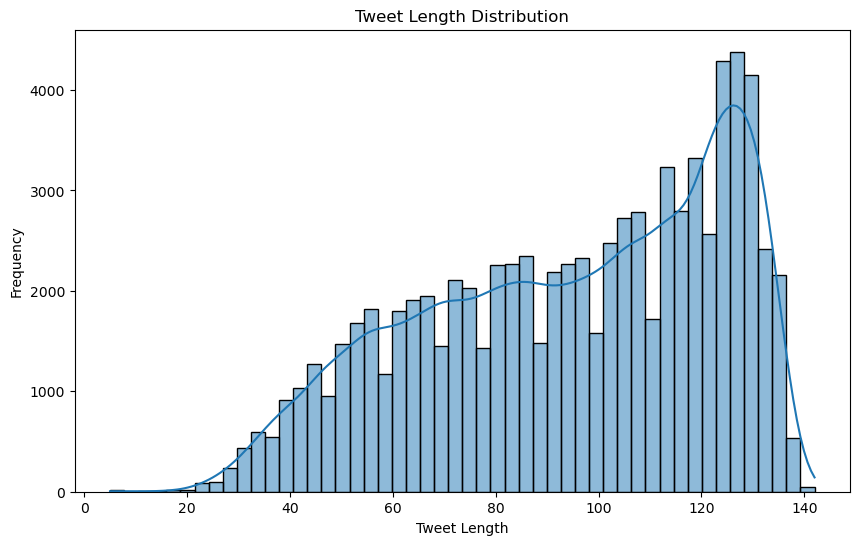

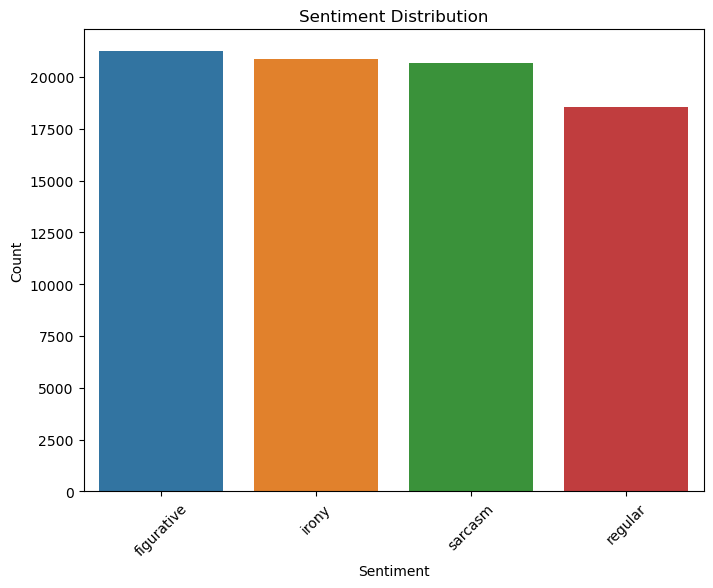

In [14]:
# Create a bar plot to visualize the sentiment distribution
sentiment_counts = df['class'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

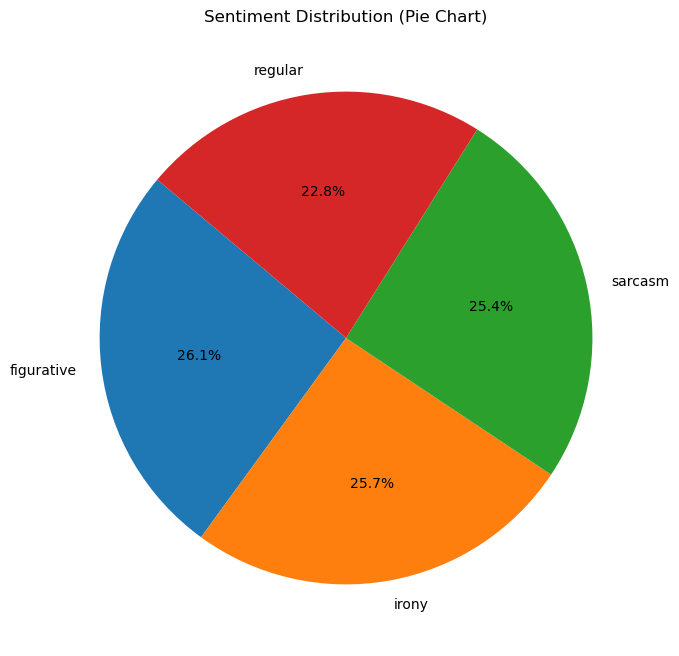

In [15]:
# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (Pie Chart)')
plt.show()

C:\Users\Usee\AppData\Local\Temp\ipykernel_12084\220788851.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tweet_length'][df['class'] == 'Regular'], label='Regular', shade=True)
C:\Users\Usee\AppData\Local\Temp\ipykernel_12084\220788851.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tweet_length'][df['class'] == 'Sarcasm'], label='Sarcasm', shade=True)
C:\Users\Usee\AppData\Local\Temp\ipykernel_12084\220788851.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tweet_length'][df['class'] == 'Irony'], label='Irony', shade=True)
C:\Users\Usee\AppData\Local\Temp\ipykernel_12084\220788851.py:6: FutureWar

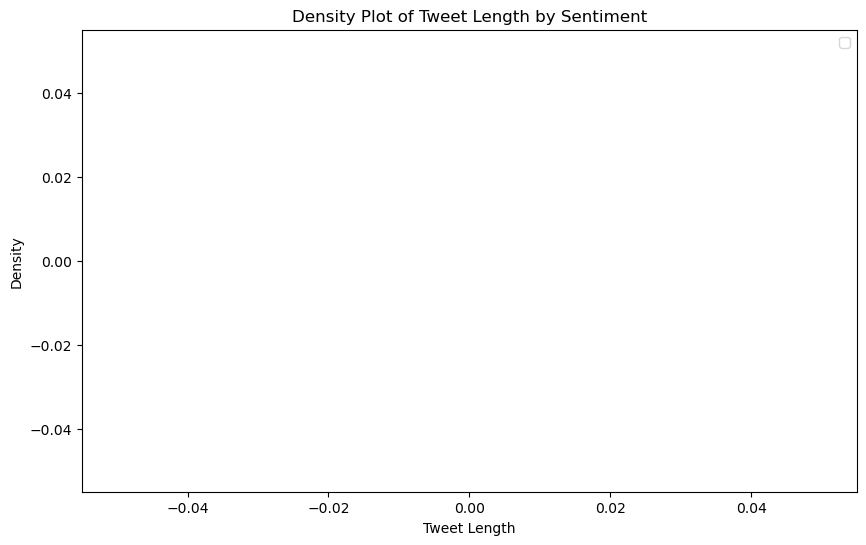

In [16]:
# Create a density plot to visualize the relationship between tweet length and sentiment
plt.figure(figsize=(10, 6))
sns.kdeplot(df['tweet_length'][df['class'] == 'Regular'], label='Regular', shade=True)
sns.kdeplot(df['tweet_length'][df['class'] == 'Sarcasm'], label='Sarcasm', shade=True)
sns.kdeplot(df['tweet_length'][df['class'] == 'Irony'], label='Irony', shade=True)
sns.kdeplot(df['tweet_length'][df['class'] == 'Figurative'], label='Figurative', shade=True)
plt.title('Density Plot of Tweet Length by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.legend()
plt.show()

In [17]:
from wordcloud import WordCloud

In [18]:
from wordcloud import WordCloud

# Example for one sentiment class (repeat for each class if needed)
sentiment_class = 'Sarcasm'  # Change to the desired sentiment class
class_tweets = df[df['class'] == sentiment_class]['tweets']

# Check if there is data for the selected sentiment class
if len(class_tweets) > 0:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(class_tweets))

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_class} Tweets')
    plt.axis('off')
    plt.show()
else:
    print(f'No data available for sentiment class: {sentiment_class}')

No data available for sentiment class: Sarcasm


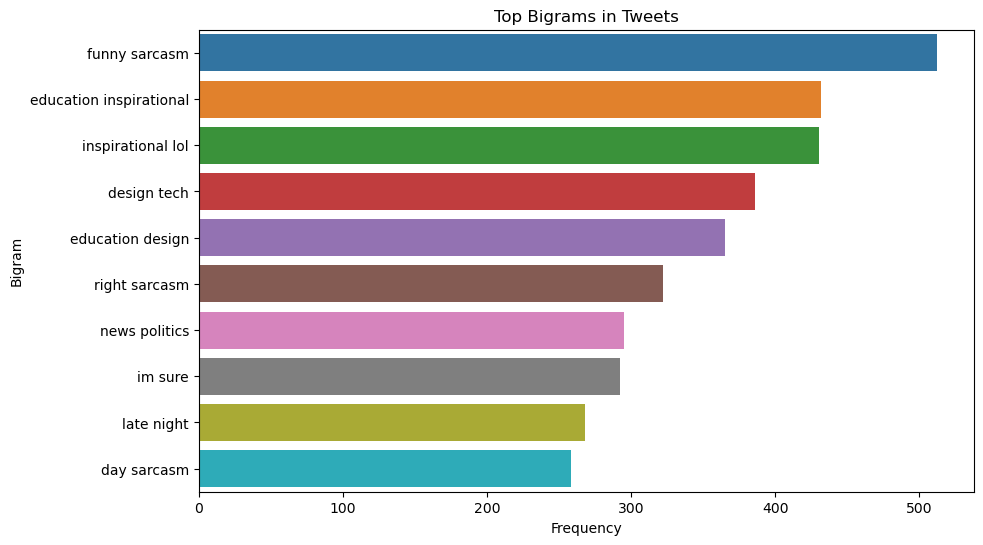

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Example for bigrams (repeat for trigrams, etc.)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(df['tweets'])

# Get the most common bigrams
bigram_freq = pd.DataFrame(bigram_matrix.sum(axis=0), columns=bigram_vectorizer.get_feature_names_out())
top_bigrams = bigram_freq.T.sort_values(by=0, ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bigrams[0], y=top_bigrams.index)
plt.title('Top Bigrams in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

# Step 4: Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

# Step 4: Data Splitting
# Split your dataset into training, validation, and test sets
# Typically, an 80-10-10 split is a good starting point

# Define the features (X) and target (y)
X = df['tweets']  # Assuming 'tweet' is the feature column
y = df['class']  # Assuming 'class' is the target column

In [21]:
X

0        be aware  dirty step to get money  staylight s...
1        sarcasm for people who dont understand diy art...
2        iminworkjeremy medsingle dailymail readers bei...
3        wilw why do i get the feeling you like games s...
4        teacherarthurg rweingarten you probably just m...
                               ...                        
81403    photo image via we heart it httptcoky8nf8z9oi ...
81404    i never knewi better put this out to the unive...
81405    hey just wanted to say thanks  puberty for let...
81406    im sure coverage like the fox news special the...
81407    skeyno16 at u13 i wont believe it until i see ...
Name: tweets, Length: 81359, dtype: object

In [22]:
y

0        figurative
1        figurative
2        figurative
3        figurative
4        figurative
            ...    
81403       sarcasm
81404       sarcasm
81405       sarcasm
81406       sarcasm
81407       sarcasm
Name: class, Length: 81359, dtype: object

In [23]:
# Split the data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Further split the temporary set into validation (50%) and test (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 5: Feature Engineering and model building

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [26]:
# Step 5: Feature Engineering and Model Training

# Feature Engineering: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [27]:
# Define a list of machine learning models to try
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Iterate through models, train, and evaluate
for model_name, model in models:
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)

    print(f"Evaluating {model_name} on Validation Set...")
    y_val_pred = model.predict(X_val_tfidf)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_val_pred))

Training Logistic Regression...
Evaluating Logistic Regression on Validation Set...
Accuracy: 0.7136
              precision    recall  f1-score   support

  figurative       0.21      0.04      0.07      2092
       irony       0.66      0.93      0.77      2123
     regular       0.99      1.00      1.00      1836
     sarcasm       0.66      0.92      0.77      2085

    accuracy                           0.71      8136
   macro avg       0.63      0.72      0.65      8136
weighted avg       0.62      0.71      0.64      8136

Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes on Validation Set...
Accuracy: 0.6118
              precision    recall  f1-score   support

  figurative       0.29      0.26      0.27      2092
       irony       0.62      0.64      0.63      2123
     regular       0.94      0.87      0.90      1836
     sarcasm       0.63      0.71      0.67      2085

    accuracy                           0.61      8136
   macro avg       0.62      

In [28]:
#////////////////////////////////////////////////////////////////////////////////////////////////////////

In [29]:
# Assuming you have selected the Support Vector Machine (SVM) as your model
selected_model = SVC(kernel='linear')
selected_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [30]:
# Evaluate the selected model on the test set
y_test_pred = selected_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

Accuracy on Test Set: 0.7432
              precision    recall  f1-score   support

  figurative       0.41      0.01      0.02      2076
       irony       0.68      1.00      0.80      2163
     regular       1.00      1.00      1.00      1863
     sarcasm       0.66      0.99      0.79      2034

    accuracy                           0.74      8136
   macro avg       0.69      0.75      0.65      8136
weighted avg       0.68      0.74      0.65      8136



# sentiment analysis

In [ ]:
#She said the most ironic thing during the meeting = irony
#The novel's plot was so figurative that it left me perplexed = regular
#That was the most sarcastic comment I've ever heard = sarcasm

In [40]:
 # Example input text for testing
input_text = "The novel's plot was so figurative that it left me perplexed"

# Preprocess the input text (you may need to apply the same preprocessing steps as during training)
input_text = input_text.lower()
input_text = remove_punctuation(input_text)  # Assuming you have the remove_punctuation function defined

# Tokenize and convert the input text to TF-IDF features
input_features = tfidf_vectorizer.transform([input_text])  # Use the same vectorizer you used during training

# Predict class label
predicted_class = selected_model.predict(input_features)[0]

# Map class label to sentiment
class_to_sentiment_mapping = {
    'irony': 'negative',
    'sarcasm': 'negative',
    'regular': 'neutral',
    'figurative': 'positive'
}
predicted_sentiment = class_to_sentiment_mapping.get(predicted_class, 'unknown')

print(f"Predicted Class: {predicted_class}")
print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Class: regular
Predicted Sentiment: neutral


In [39]:
#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [34]:
import joblib

# Define file paths to save the models and vectorizer
model_file_path = 'ttrmodel.pkl'  # Adjust the file name as needed
vectorizer_file_path = 'vectorizer.pkl'  # Adjust the file name as needed

# Save the selected model to a file
joblib.dump(selected_model, model_file_path)

# Save the TF-IDF vectorizer to a file
joblib.dump(tfidf_vectorizer, vectorizer_file_path)

print(f"Model saved to {model_file_path}")
print(f"Vectorizer saved to {vectorizer_file_path}")

Model saved to ttrmodel.pkl
Vectorizer saved to vectorizer.pkl


In [35]:
import os

model_file_path = 'ttrmodel.pkl'
vectorizer_file_path = 'vectorizer.pkl'

print(f"Model file size: {os.path.getsize(model_file_path)} bytes")
print(f"Vectorizer file size: {os.path.getsize(vectorizer_file_path)} bytes")

Model file size: 8237977 bytes
Vectorizer file size: 1664368 bytes


In [46]:
import joblib
print(joblib.__version__)

1.1.1
